# Imports

In [48]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [49]:
year = 2022
gp_round = 3
ses = 'R'

In [50]:
driver_1 = 'VER'
driver_2 = 'LEC'

In [51]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']


In [52]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [53]:
results = session.results

In [54]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-04-10 06:29:39.980,0 days 02:28:39.969000,,NaN,0 days 00:00:00,10861,304,8,100,False,12,interpolation,0.181566,0.000035,OnTrack,-1194,-1333,85
3,2022-04-10 06:29:40.018,0 days 02:28:40.007000,,NaN,0 days 00:00:00.038000,10869,305,8,100,False,12,pos,3.420203,0.000657,OnTrack,-1217,-1312,85
4,2022-04-10 06:29:40.057,0 days 02:28:40.046000,,NaN,0 days 00:00:00.077000,10884,306,8,100,False,12,car,6.747500,0.001296,OnTrack,-1239,-1290,84
5,2022-04-10 06:29:40.199,0 days 02:28:40.188000,,NaN,0 days 00:00:00.219000,10952,307,8,100,False,12,pos,18.891086,0.003629,OnTrack,-1328,-1206,84
6,2022-04-10 06:29:40.337,0 days 02:28:40.326000,,NaN,0 days 00:00:00.357000,11021,308,8,100,False,12,car,30.703056,0.005899,OnTrack,-1450,-1089,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2022-04-10 06:30:59.778,0 days 02:29:59.767000,,NaN,0 days 00:01:19.798000,11600,287,7,100,False,0,car,5166.352500,0.992559,OnTrack,-911,-1602,86
598,2022-04-10 06:30:59.779,0 days 02:29:59.768000,,NaN,0 days 00:01:19.799000,11621,288,7,100,False,0,pos,5166.432675,0.992574,OnTrack,-912,-1602,86
599,2022-04-10 06:31:00.018,0 days 02:30:00.007000,,NaN,0 days 00:01:20.038000,11642,290,7,100,False,0,car,5185.685833,0.996273,OnTrack,-1059,-1462,85
600,2022-04-10 06:31:00.059,0 days 02:30:00.048000,,NaN,0 days 00:01:20.079000,11673,290,7,100,False,0,pos,5188.997055,0.996909,OnTrack,-1085,-1438,85


In [55]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:27.733000,26.0,48.0,1014.5,False,40.6,299,2.9
1,0 days 00:01:27.730000,25.9,48.0,1014.5,False,40.6,284,2.5
2,0 days 00:02:27.732000,25.9,48.0,1014.5,False,40.6,342,2.4
3,0 days 00:03:27.735000,25.9,48.0,1014.5,False,40.7,295,2.4
4,0 days 00:04:27.764000,25.8,48.0,1014.5,False,41.2,289,2.7
...,...,...,...,...,...,...,...,...
151,0 days 02:31:27.982000,27.3,42.0,1014.0,False,34.0,318,1.2
152,0 days 02:32:27.983000,27.2,42.0,1014.0,False,34.0,184,0.8
153,0 days 02:33:27.981000,27.1,41.0,1013.9,False,34.0,285,1.5
154,0 days 02:34:27.983000,27.1,40.0,1014.0,False,33.8,305,1.8


In [56]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [57]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [58]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [59]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [60]:
ref_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2022-04-10 06:00:34.474,0 days 01:59:34.463000,11390,287,7,100,False,0,interpolation,0 days 00:00:00,0.000000
1,2022-04-10 06:00:34.613,0 days 01:59:34.602000,11420,288,7,100,False,0,car,0 days 00:00:00.139000,11.120000
2,2022-04-10 06:00:34.813,0 days 01:59:34.802000,11452,289,7,100,False,0,car,0 days 00:00:00.339000,27.175556
3,2022-04-10 06:00:35.173,0 days 01:59:35.162000,11426,291,7,100,False,0,car,0 days 00:00:00.699000,56.275556
4,2022-04-10 06:00:35.573,0 days 01:59:35.562000,11465,291,7,100,False,0,car,0 days 00:00:01.099000,88.608889
...,...,...,...,...,...,...,...,...,...,...,...
298,2022-04-10 06:01:55.413,0 days 02:00:55.402000,11308,284,7,100,False,0,car,0 days 00:01:20.939000,5153.728056
299,2022-04-10 06:01:55.613,0 days 02:00:55.602000,11357,286,7,100,False,0,car,0 days 00:01:21.139000,5169.616944
300,2022-04-10 06:01:55.853,0 days 02:00:55.842000,11331,288,7,100,False,0,car,0 days 00:01:21.379000,5188.816944
301,2022-04-10 06:01:56.133,0 days 02:00:56.122000,11443,290,7,100,False,0,car,0 days 00:01:21.659000,5211.372500


In [61]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [62]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [63]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:08.114000,16,0 days 00:01:24.746000,2,1,NaT,NaT,0 days 00:00:29.566000,0 days 00:00:18.608000,0 days 00:00:36.572000,0 days 01:04:12.934000,0 days 01:04:31.542000,0 days 01:05:08.114000,262.0,293.0,280.0,280.0,False,MEDIUM,2.0,True,0 days 01:03:43.368000,Ferrari,LEC,2,True,2022-04-10 05:04:43.379
6,0 days 01:15:10.407000,16,0 days 00:01:23.957000,7,1,NaT,NaT,0 days 00:00:29.295000,0 days 00:00:18.446000,0 days 00:00:36.216000,0 days 01:14:15.745000,0 days 01:14:34.191000,0 days 01:15:10.407000,263.0,299.0,281.0,280.0,False,MEDIUM,7.0,True,0 days 01:13:46.450000,Ferrari,LEC,1,False,2022-04-10 05:14:46.461
7,0 days 01:16:33.996000,16,0 days 00:01:23.589000,8,1,NaT,NaT,0 days 00:00:29.198000,0 days 00:00:18.450000,0 days 00:00:35.941000,0 days 01:15:39.605000,0 days 01:15:58.055000,0 days 01:16:33.996000,265.0,294.0,282.0,284.0,False,MEDIUM,8.0,True,0 days 01:15:10.407000,Ferrari,LEC,1,True,2022-04-10 05:16:10.418
8,0 days 01:17:57.386000,16,0 days 00:01:23.390000,9,1,NaT,NaT,0 days 00:00:28.887000,0 days 00:00:18.477000,0 days 00:00:36.026000,0 days 01:17:02.883000,0 days 01:17:21.360000,0 days 01:17:57.386000,270.0,297.0,281.0,286.0,False,MEDIUM,9.0,True,0 days 01:16:33.996000,Ferrari,LEC,1,True,2022-04-10 05:17:34.007
9,0 days 01:19:20.746000,16,0 days 00:01:23.360000,10,1,NaT,NaT,0 days 00:00:28.936000,0 days 00:00:18.476000,0 days 00:00:35.948000,0 days 01:18:26.322000,0 days 01:18:44.798000,0 days 01:19:20.746000,272.0,300.0,282.0,283.0,False,MEDIUM,10.0,True,0 days 01:17:57.386000,Ferrari,LEC,1,True,2022-04-10 05:18:57.397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0 days 01:29:48.214000,5,0 days 00:01:25.189000,17,1,NaT,NaT,0 days 00:00:29.513000,0 days 00:00:18.708000,0 days 00:00:36.968000,0 days 01:28:52.538000,0 days 01:29:11.246000,0 days 01:29:48.214000,271.0,300.0,286.0,291.0,True,HARD,18.0,False,0 days 01:28:23.025000,Aston Martin,VET,1,True,2022-04-10 05:29:23.036
1036,0 days 01:31:13.581000,5,0 days 00:01:25.367000,18,1,NaT,NaT,0 days 00:00:29.641000,0 days 00:00:18.758000,0 days 00:00:36.968000,0 days 01:30:17.855000,0 days 01:30:36.613000,0 days 01:31:13.581000,264.0,303.0,286.0,289.0,False,HARD,19.0,False,0 days 01:29:48.214000,Aston Martin,VET,1,True,2022-04-10 05:30:48.225
1037,0 days 01:32:39.084000,5,0 days 00:01:25.503000,19,1,NaT,NaT,0 days 00:00:29.519000,0 days 00:00:18.562000,0 days 00:00:37.422000,0 days 01:31:43.100000,0 days 01:32:01.662000,0 days 01:32:39.084000,273.0,303.0,285.0,290.0,False,HARD,20.0,False,0 days 01:31:13.581000,Aston Martin,VET,1,True,2022-04-10 05:32:13.592
1038,0 days 01:34:04.482000,5,0 days 00:01:25.398000,20,1,NaT,NaT,0 days 00:00:29.553000,0 days 00:00:18.662000,0 days 00:00:37.183000,0 days 01:33:08.637000,0 days 01:33:27.299000,0 days 01:34:04.482000,NaN,300.0,286.0,291.0,False,HARD,21.0,False,0 days 01:32:39.084000,Aston Martin,VET,1,True,2022-04-10 05:33:39.095


In [64]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [65]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [66]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [67]:
start_x

-1218

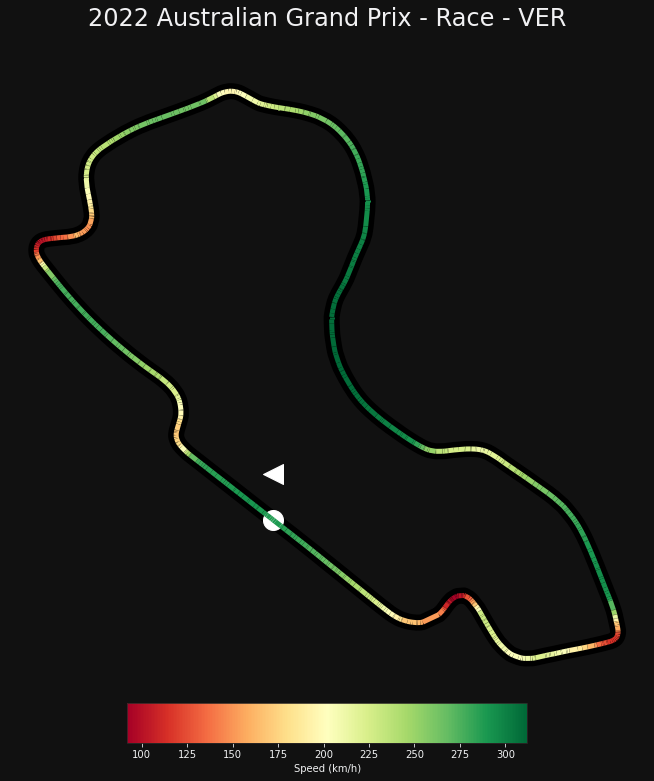

In [68]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

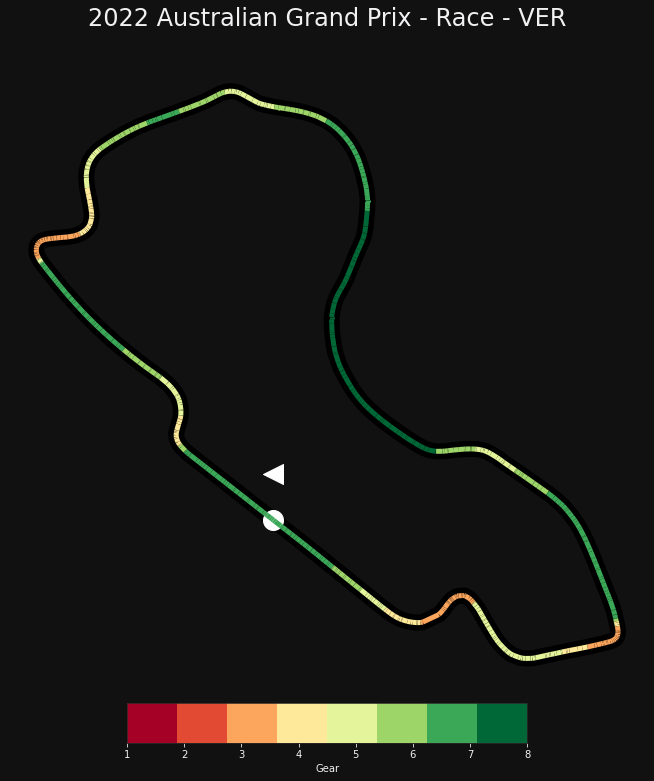

In [69]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [70]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

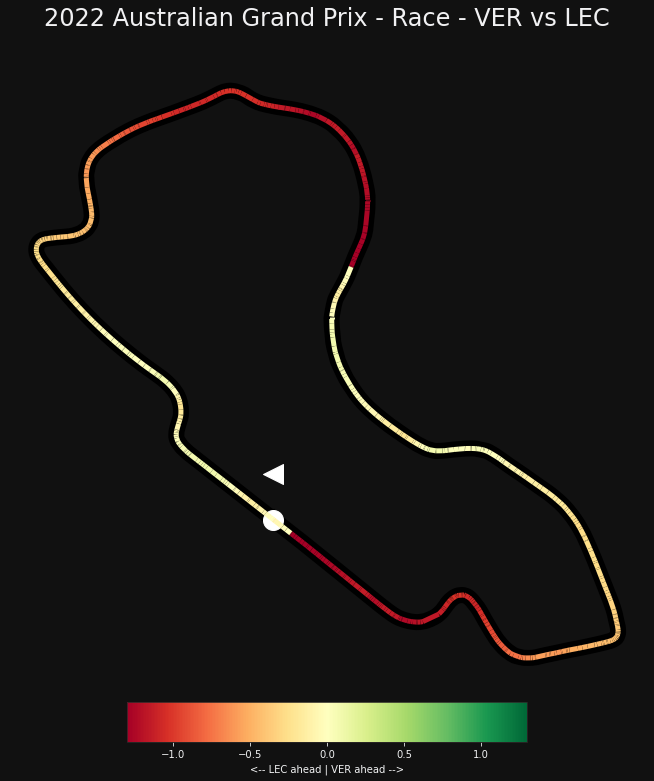

In [71]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_2['X'], lap_2['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [72]:
race = session.laps
race.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1042 non-null   timedelta64[ns]
 1   DriverNumber        1042 non-null   object         
 2   LapTime             1005 non-null   timedelta64[ns]
 3   LapNumber           1042 non-null   int64          
 4   Stint               1042 non-null   int64          
 5   PitOutTime          42 non-null     timedelta64[ns]
 6   PitInTime           22 non-null     timedelta64[ns]
 7   Sector1Time         1020 non-null   timedelta64[ns]
 8   Sector2Time         1042 non-null   timedelta64[ns]
 9   Sector3Time         1042 non-null   timedelta64[ns]
 10  Sector1SessionTime  1020 non-null   timedelta64[ns]
 11  Sector2SessionTime  1042 non-null   timedelta64[ns]
 12  Sector3SessionTime  1042 non-null   timedelta64[ns]
 13  SpeedI1             918 non-null    float64 

In [73]:
race = race.sort_values('Time').reset_index(drop=True)
race

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:43.368000,16,NaT,1,1,0 days 00:24:52.909000,NaT,NaT,0 days 00:00:18.645000,0 days 00:00:36.781000,NaT,0 days 01:03:06.669000,0 days 01:03:43.458000,261.0,301.0,277.0,277.0,False,MEDIUM,1.0,True,0 days 01:02:13.396000,Ferrari,LEC,1,False,2022-04-10 05:03:13.407
1,0 days 01:03:43.991000,1,NaT,1,1,0 days 00:25:41.090000,NaT,NaT,0 days 00:00:18.652000,0 days 00:00:36.822000,NaT,0 days 01:03:07.261000,0 days 01:03:44.084000,270.0,295.0,282.0,278.0,False,MEDIUM,1.0,True,0 days 01:02:13.396000,Red Bull Racing,VER,1,False,2022-04-10 05:03:13.407
2,0 days 01:03:44.982000,44,NaT,1,1,0 days 00:26:13.061000,NaT,NaT,0 days 00:00:18.837000,0 days 00:00:36.593000,NaT,0 days 01:03:08.474000,0 days 01:03:45.066000,266.0,299.0,276.0,275.0,False,MEDIUM,1.0,True,0 days 01:02:13.396000,Mercedes,HAM,1,False,2022-04-10 05:03:13.407
3,0 days 01:03:45.886000,11,NaT,1,1,0 days 00:23:20.145000,NaT,NaT,0 days 00:00:18.744000,0 days 00:00:37.278000,NaT,0 days 01:03:08.711000,0 days 01:03:46.003000,268.0,305.0,284.0,275.0,False,MEDIUM,1.0,True,0 days 01:02:13.396000,Red Bull Racing,PER,1,False,2022-04-10 05:03:13.407
4,0 days 01:03:46.988000,63,NaT,1,1,0 days 00:25:22.474000,NaT,NaT,0 days 00:00:18.894000,0 days 00:00:37.602000,NaT,0 days 01:03:09.449000,0 days 01:03:47.050000,259.0,293.0,279.0,284.0,False,MEDIUM,1.0,True,0 days 01:02:13.396000,Mercedes,RUS,1,False,2022-04-10 05:03:13.407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0 days 02:31:08.644000,77,0 days 00:01:22.757000,58,2,NaT,NaT,0 days 00:00:28.758000,0 days 00:00:18.357000,0 days 00:00:35.642000,0 days 02:30:14.645000,0 days 02:30:33.002000,0 days 02:31:08.644000,270.0,302.0,280.0,NaN,False,HARD,NaN,True,0 days 02:29:45.887000,Alfa Romeo,BOT,1,True,2022-04-10 06:30:45.898
1038,0 days 02:31:16.430000,10,0 days 00:01:23.333000,58,2,NaT,NaT,0 days 00:00:28.864000,0 days 00:00:18.552000,0 days 00:00:35.917000,0 days 02:30:21.961000,0 days 02:30:40.513000,0 days 02:31:16.430000,NaN,292.0,283.0,NaN,False,HARD,NaN,True,0 days 02:29:53.097000,AlphaTauri,GAS,1,True,2022-04-10 06:30:53.108
1039,0 days 02:31:19.566000,23,0 days 00:01:27.465000,58,2,0 days 02:29:54.177000,NaT,0 days 00:00:33.516000,0 days 00:00:18.353000,0 days 00:00:35.596000,0 days 02:30:25.617000,0 days 02:30:43.970000,0 days 02:31:19.566000,269.0,298.0,288.0,234.0,False,SOFT,1.0,True,0 days 02:29:52.101000,Williams,ALB,1,False,2022-04-10 06:30:52.112
1040,0 days 02:31:21.879000,24,0 days 00:01:26.097000,58,2,NaT,NaT,0 days 00:00:31.204000,0 days 00:00:18.607000,0 days 00:00:36.286000,0 days 02:30:26.986000,0 days 02:30:45.593000,0 days 02:31:21.879000,265.0,299.0,283.0,NaN,False,HARD,37.0,True,0 days 02:29:55.782000,Alfa Romeo,ZHO,1,True,2022-04-10 06:30:55.793


In [74]:
session.race_control_messages

,Time,Category,Message,Status,Flag,Scope,Sector,RacingNumber
0,2022-04-10 04:20:01,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None
1,2022-04-10 04:30:01,Other,PIT EXIT CLOSED,None,None,None,NaN,None
2,2022-04-10 04:45:03,Other,RISK OF RAIN FOR F1 RACE IS 0%,None,None,None,NaN,None
3,2022-04-10 04:57:13,Drs,DRS DISABLED,DISABLED,None,None,NaN,None
4,2022-04-10 05:03:13,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,None
...,...,...,...,...,...,...,...,...
58,2022-04-10 06:36:21,Flag,CLEAR IN TRACK SECTOR 7,None,CLEAR,Sector,7.0,None
59,2022-04-10 06:36:21,Flag,CLEAR IN TRACK SECTOR 15,None,CLEAR,Sector,15.0,None
60,2022-04-10 06:36:21,Other,DRS ENABLED IN ZONE 1,None,None,None,NaN,None
61,2022-04-10 06:47:09,Flag,YELLOW IN TRACK SECTOR 6,None,YELLOW,Sector,6.0,None


In [75]:
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:27:46.548000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:28:07.072000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,6.0,NaT,NaT,NaT,0 days 01:28:12.141000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,5.0,NaT,NaT,NaT,0 days 01:28:15.091000,Finished,12.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,4.0,NaT,NaT,NaT,0 days 01:28:39.851000,Finished,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,16.0,18.0,NaT,NaT,NaT,NaT,+1 Lap,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,17.0,10.0,NaT,NaT,NaT,NaT,+1 Lap,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,18.0,2.0,NaT,NaT,NaT,NaT,Hydraulics,0.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,19.0,17.0,NaT,NaT,NaT,NaT,Accident,0.0


In [76]:
# driver_standings = pd.DataFrame(columns=['Abbreviation', 'TotalPoints'])
# driver_standings['Abbreviation'] = results['Abbreviation']
# driver_standings['TotalPoints'] = results['Points']
# driver_standings.to_csv('driver_standings.csv')

# Tests

In [77]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [78]:
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
        
    return standings_dict

driver_standings = update_driver_standings(22)
driver_standings

{'LEC': ['26', '45', '71', '86', '104', '104', '116'],
 'SAI': ['18', '33', '33', '38', '53', '65', '83'],
 'HAM': ['15', '16', '28', '28', '36', '46', '50'],
 'RUS': ['12', '22', '37', '49', '59', '74', '84'],
 'MAG': ['10', '12', '12', '15', '15', '15', '15'],
 'BOT': ['8', '8', '12', '24', '30', '38', '40'],
 'OCO': ['6', '14', '20', '20', '24', '30', '30'],
 'TSU': ['4', '4', '4', '10', '10', '11', '11'],
 'ALO': ['2', '2', '2', '2', '2', '4', '10'],
 'ZHO': ['1', '1', '1', '1', '1', '1', '1'],
 'MSC': ['0', '0', '0', '0', '0', '0', '0'],
 'STR': ['0', '0', '0', '1', '2', '2', '2'],
 'ALB': ['0', '0', '1', '1', '3', '3', '3'],
 'RIC': ['0', '0', '8', '11', '11', '11', '11'],
 'NOR': ['0', '6', '16', '35', '35', '39', '48'],
 'LAT': ['0', '0', '0', '0', '0', '0', '0'],
 'HUL': ['0', '0', '0', '0', '0', '0', '0'],
 'PER': ['0', '12', '30', '54', '66', '85', '110'],
 'VER': ['0', '25', '25', '59', '85', '110', '125'],
 'GAS': ['0', '4', '6', '6', '6', '6', '6'],
 'VET': [0, 0, '0', '4

In [79]:
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    return standings_dict

constructor_standings = update_constructor_standings(22)
constructor_standings

{'Ferrari': ['44', '78', '104', '124', '157', '169', '199'],
 'Mercedes': ['27', '38', '65', '77', '95', '120', '134'],
 'Haas F1 Team': ['10', '12', '12', '15', '15', '15', '15'],
 'Alfa Romeo': ['9', '9', '13', '25', '31', '39', '41'],
 'Alpine F1 Team': ['8', '16', '22', '22', '26', '34', '40'],
 'AlphaTauri': ['4', '8', '10', '16', '16', '17', '17'],
 'Aston Martin': ['0', '0', '0', '5', '6', '6', '7'],
 'Williams': ['0', '0', '1', '1', '3', '3', '3'],
 'McLaren': ['0', '6', '24', '46', '46', '50', '59'],
 'Red Bull': ['0', '37', '55', '113', '151', '195', '235']}

In [86]:
df_drivers = pd.DataFrame.from_dict(driver_standings, orient='index')
df_drivers.columns = df_drivers.columns + 1
df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
df_drivers

,1,2,3,4,5,6,7
LEC,26,45,71,86,104,104,116
SAI,18,33,33,38,53,65,83
HAM,15,16,28,28,36,46,50
RUS,12,22,37,49,59,74,84
MAG,10,12,12,15,15,15,15
...,...,...,...,...,...,...,...
HUL,0,0,0,0,0,0,0
PER,0,12,30,54,66,85,110
VER,0,25,25,59,85,110,125
GAS,0,4,6,6,6,6,6


In [87]:
df_constructors = pd.DataFrame.from_dict(constructor_standings, orient='index')
df_constructors.columns = df_constructors.columns + 1
df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
df_constructors

,1,2,3,4,5,6,7
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
Haas F1 Team,10,12,12,15,15,15,15
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3
McLaren,0,6,24,46,46,50,59
Red Bull,0,37,55,113,151,195,235


In [88]:
df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
df_drivers_line

,Round,LEC,VER
0,1,26,0
1,2,45,25
2,3,71,25
3,4,86,59
4,5,104,85
5,6,104,110
6,7,116,125


In [89]:
# driver_1_team_color = session.results[]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Round   7 non-null      int64
 1   LEC     7 non-null      int64
 2   VER     7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


In [91]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_drivers_line['Round'], y=df_drivers_line[driver_1], name=driver_1, line_color='#00ff00'))
fig.add_trace(go.Scatter(x=df_drivers_line['Round'], y=df_drivers_line[driver_2], name=driver_2))

fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", xaxis_title="Round", yaxis_title="Points")
fig.show()